<a href="https://colab.research.google.com/github/LogBlast/projectdata_group6/blob/notebook/project_group6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Final Project Submission - Group 6***

# 1) Data importation

In [215]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

df = pd.read_csv("online_gaming_behavior_dataset.csv")
df

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium


# 2) Data cleaning

## a) Is null detection

*The dataset doesn't contain any null values because it's intended for data processing on Kaggle, and therefore must be cleaned and free of issues.*

In [216]:
df.isnull().sum()
display(df)
print("The dataset is already clean")

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium


The dataset is already clean


## b) Preprocessing data

In [217]:

# float
float_cols = df.select_dtypes(include='float').columns
df[float_cols] = df[float_cols].round().astype('int')

# numeric
numeric_columns = ["Age", "PlayTimeHours", "SessionsPerWeek", "PlayerLevel"]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# missing values
df.dropna(subset=numeric_columns, inplace=True)

cat_cols = df.select_dtypes(include='object').columns

display(df.head())
print(df.info())



,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,6,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,16,0,Medium,2,131,95,37,Medium


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   PlayerID                   40034 non-null  int64 
 1   Age                        40034 non-null  int64 
 2   Gender                     40034 non-null  object
 3   Location                   40034 non-null  object
 4   GameGenre                  40034 non-null  object
 5   PlayTimeHours              40034 non-null  int64 
 6   InGamePurchases            40034 non-null  int64 
 7   GameDifficulty             40034 non-null  object
 8   SessionsPerWeek            40034 non-null  int64 
 9   AvgSessionDurationMinutes  40034 non-null  int64 
 10  PlayerLevel                40034 non-null  int64 
 11  AchievementsUnlocked       40034 non-null  int64 
 12  EngagementLevel            40034 non-null  object
dtypes: int64(8), object(5)
memory usage: 4.0+ MB
None


# 3) Data Visualization

## a) 'data' distribution

array([<Axes: title={'center': 'Female'}, ylabel='Frequency'>,
       <Axes: title={'center': 'Male'}, ylabel='Frequency'>], dtype=object)

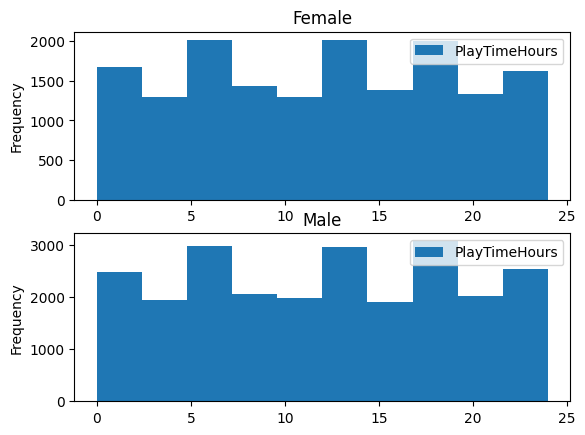

In [218]:
df.plot.hist(by="Gender", column=["PlayTimeHours"])

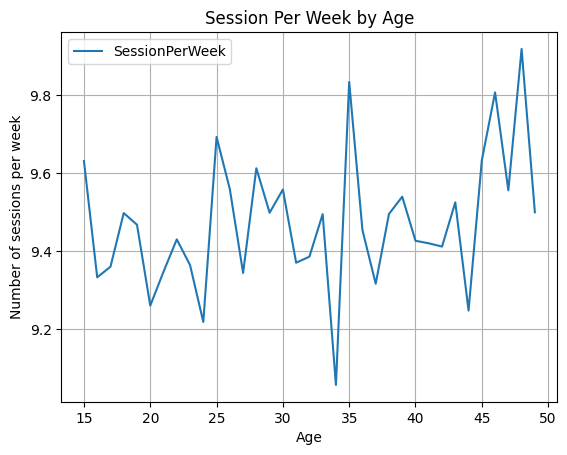

In [219]:
df_avg_age = df.groupby("Age").mean("SessionPerWeek").reset_index()
plt.plot(df_avg_age["Age"], df_avg_age["SessionsPerWeek"], label="SessionPerWeek")
plt.xlabel("Age")
plt.ylabel("Number of sessions per week")
plt.grid(True)
plt.title("Session Per Week by Age")
plt.legend()
plt.show()

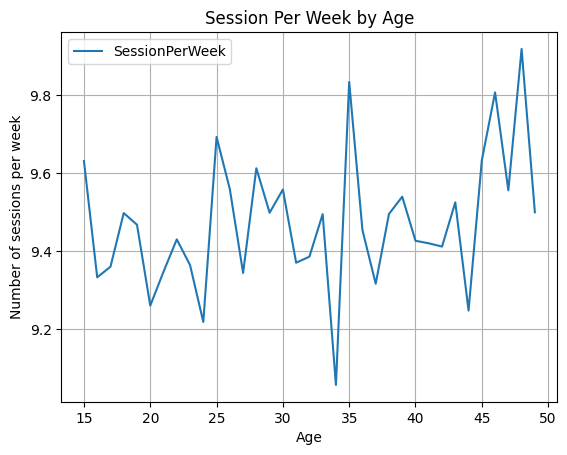

In [220]:
df_avg_age = df.groupby("Age").mean("SessionPerWeek").reset_index()
plt.plot(df_avg_age["Age"], df_avg_age["SessionsPerWeek"], label="SessionPerWeek")
plt.xlabel("Age")
plt.ylabel("Number of sessions per week")
plt.grid(True)
plt.title("Session Per Week by Age")
plt.legend()
plt.show()

## b) influence of '' type

## c) Seaborn Plots (Pair Plot, Heatmap, Correlation Matrix)

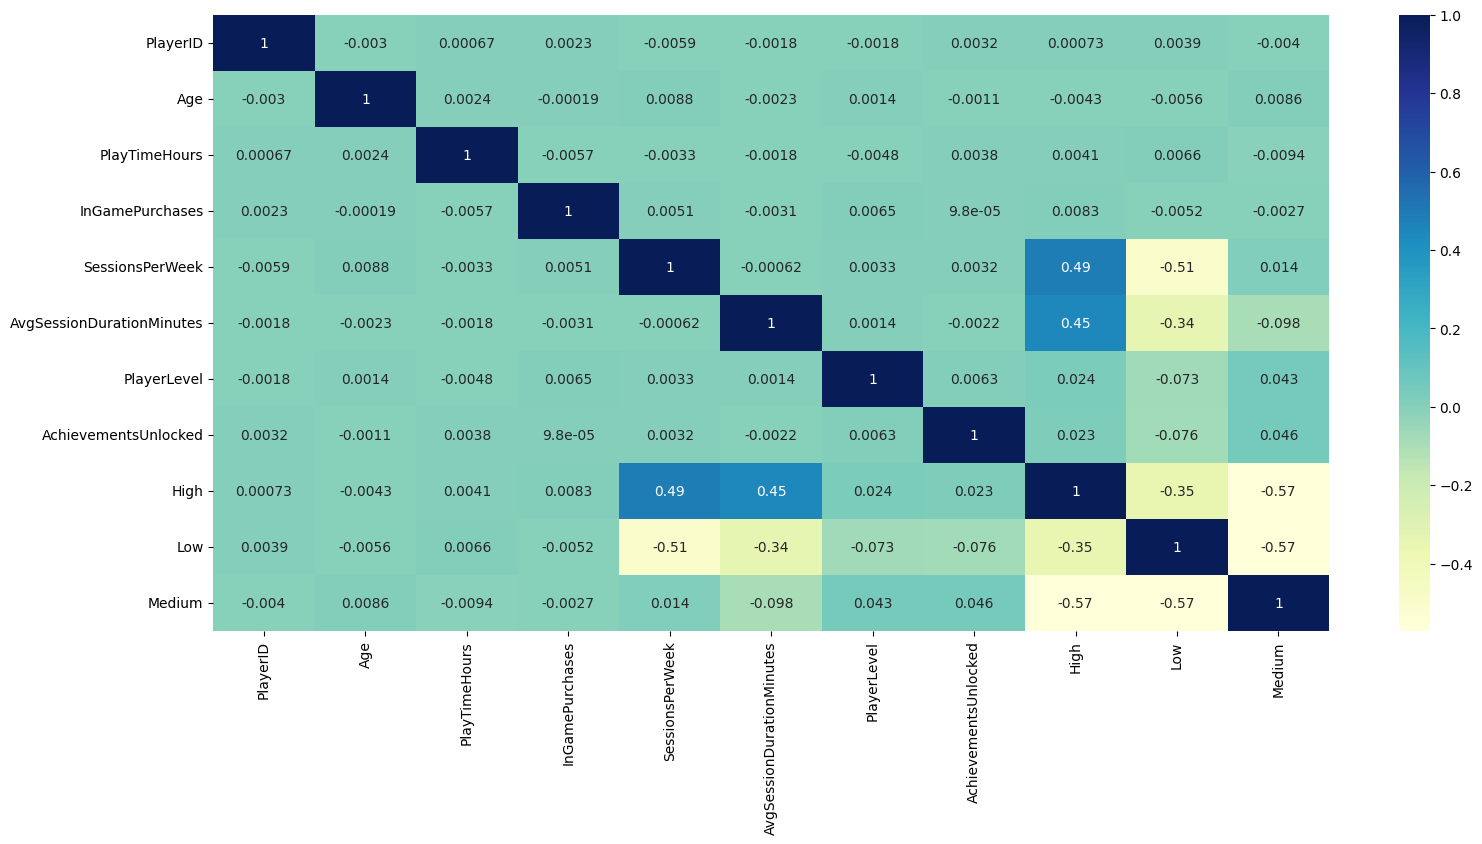

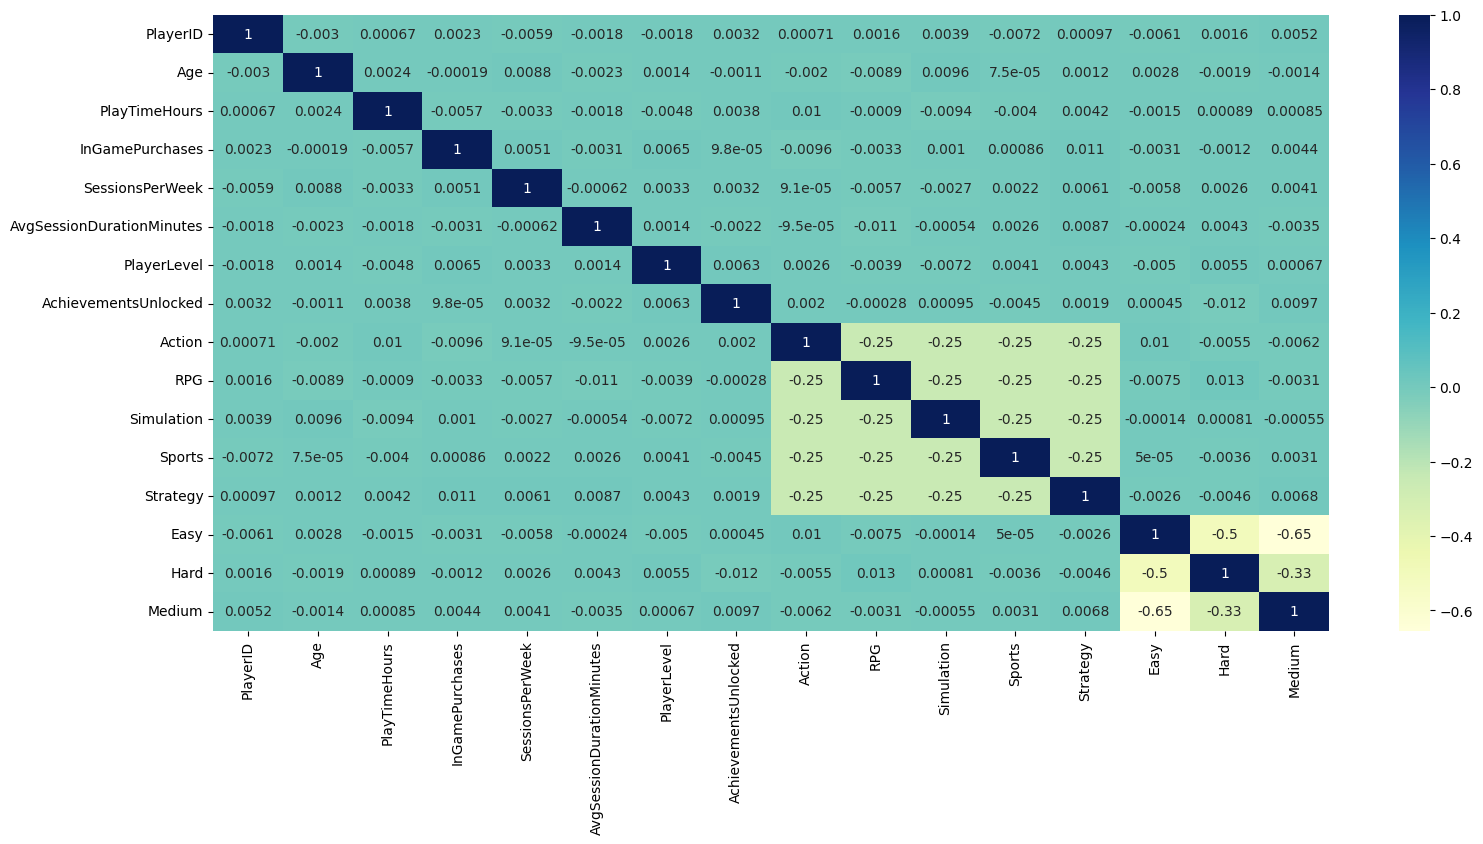

In [221]:
gender_country_data = df.join(pd.get_dummies(df.Gender)).drop(['Gender'], axis=1)
gender_country_data = df.join(pd.get_dummies(df.Location)).drop(['Location'], axis=1)
gender_country_data = df.join(pd.get_dummies(df.EngagementLevel)).drop(['EngagementLevel'], axis=1)

plt.figure(figsize=(18,8))
sns.heatmap(gender_country_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")
plt.show()

# ----------------

df_dummies = df.join(pd.get_dummies(df.GameGenre)).drop(['GameGenre'], axis=1)
df_dummies = df_dummies.join(pd.get_dummies(df_dummies.GameDifficulty)).drop(['GameDifficulty'], axis=1)
corr_matrix = df_dummies.corr(numeric_only=True)

plt.figure(figsize=(18,8))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.show()

#4) ML Model

In [222]:
df_model = df.copy()

encoder = OrdinalEncoder()
cat_cols = ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel']
df_model[cat_cols] = encoder.fit_transform(df_model[cat_cols])

# xy
X = df_model.drop(['PlayerID', 'EngagementLevel'], axis=1)
y = df_model['EngagementLevel']

# train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# random forest
rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=5,
    min_samples_split=10,
    random_state=42
)
rf.fit(X_train, y_train)

# pred and acc
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score Macro: {f1_score(y_test, y_pred, average='macro'):.4f}")
print(f"F1-Score Micro: {f1_score(y_test, y_pred, average='micro'):.4f}")
print(f"F1-Score Weighted: {f1_score(y_test, y_pred, average='weighted'):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8095
F1-Score Macro: 0.7977
F1-Score Micro: 0.8095
F1-Score Weighted: 0.8058

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.77      0.81      2035
         1.0       0.90      0.64      0.75      2093
         2.0       0.76      0.92      0.83      3879

    accuracy                           0.81      8007
   macro avg       0.84      0.78      0.80      8007
weighted avg       0.82      0.81      0.81      8007



In [223]:
from sklearn.metrics import f1_score

# macro micro f1
report = classification_report(y_test, y_pred, output_dict=True)
macro_f1 = report['macro avg']['f1-score']
micro_f1 = f1_score(y_test, y_pred, average='micro')

print("Macro F1-score:", macro_f1)
print("Micro F1-score:", micro_f1)

Macro F1-score: 0.7976569555891984
Micro F1-score: 0.8095416510553266


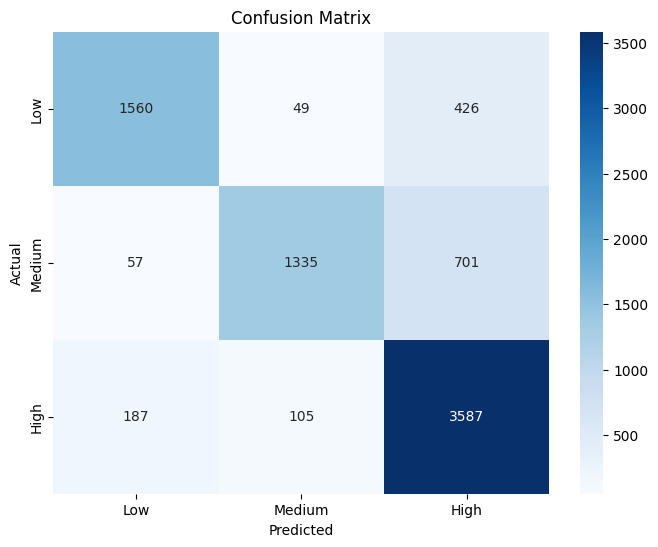

In [224]:
# conf matr
cm = confusion_matrix(y_test, y_pred)

# plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Top 15 features:

                      Feature  Importance
7             SessionsPerWeek    0.653485
8   AvgSessionDurationMinutes    0.322240
10       AchievementsUnlocked    0.010994
9                 PlayerLevel    0.009235
0                         Age    0.001457
4               PlayTimeHours    0.001075
3                   GameGenre    0.000449
6              GameDifficulty    0.000402
2                    Location    0.000318
1                      Gender    0.000175
5             InGamePurchases    0.000170


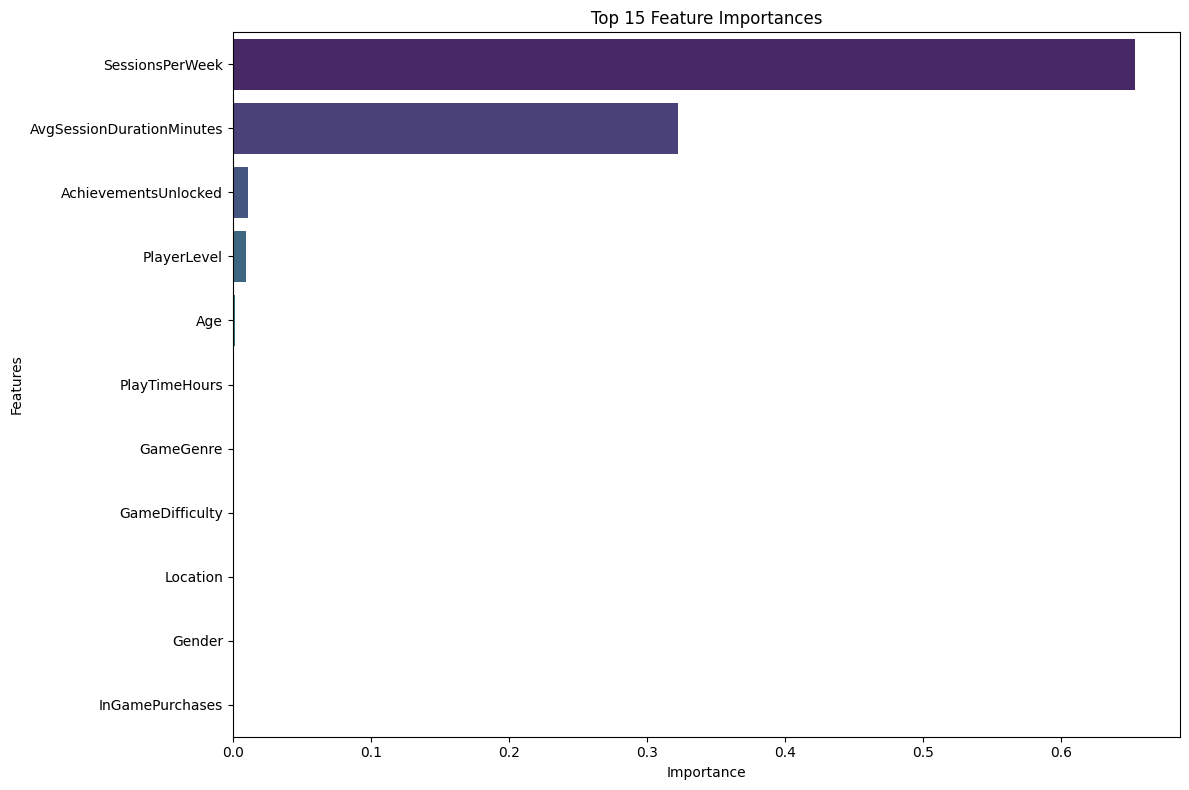


Cross-validation Accuracy: 0.817 (+/- 0.014)


In [225]:
# feature df
importance_df = pd.DataFrame()
importance_df['Feature'] = X.columns
importance_df['Importance'] = rf.feature_importances_
importance_df = importance_df.sort_values('Importance', ascending=False)

print("\nTop 15 features:\n")
print(importance_df.head(15))

plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# cross valid
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print(f"\nCross-validation Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")